In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/trainreg.csv')
test = pd.read_csv('data/testreg.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
X = train

In [7]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


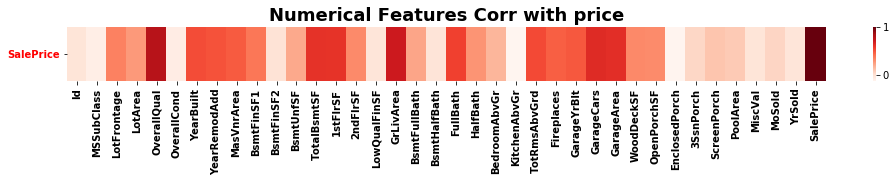

In [8]:

num = train.select_dtypes(exclude='object')
num_corr = num.corr()

#Plot the correlations

f, ax = plt.subplots(figsize=(17,1))

sns.heatmap(num_corr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Reds')
plt.title('Numerical Features Corr with price', weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='red', rotation=0)
plt.show()

In [12]:
num_corr = num_corr['SalePrice'].sort_values(ascending=False).head(15).to_frame()
num_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431


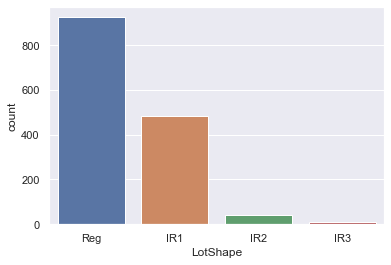

In [22]:
sns.set(style="darkgrid")
sns.countplot(x='LotShape', data=X)

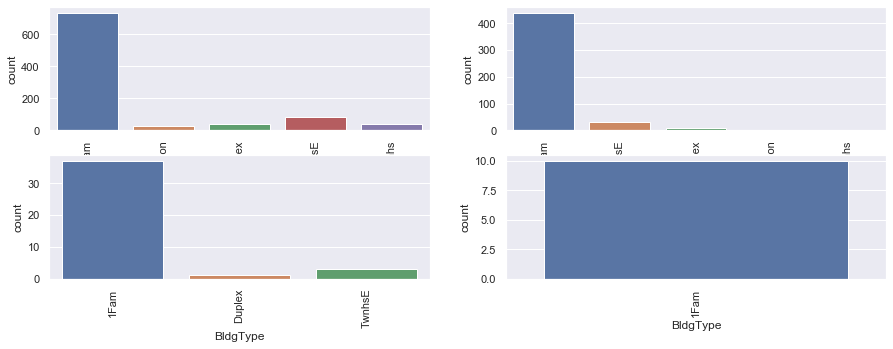

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
columns = ['Reg','IR1','IR2','IR3']

for column,axes in zip(columns, ax.flatten()):
    plt.setp(axes.get_xticklabels(), rotation=90)
    sns.countplot(x='BldgType', data=X[X.LotShape == column],ax=axes)

     
plt.show()

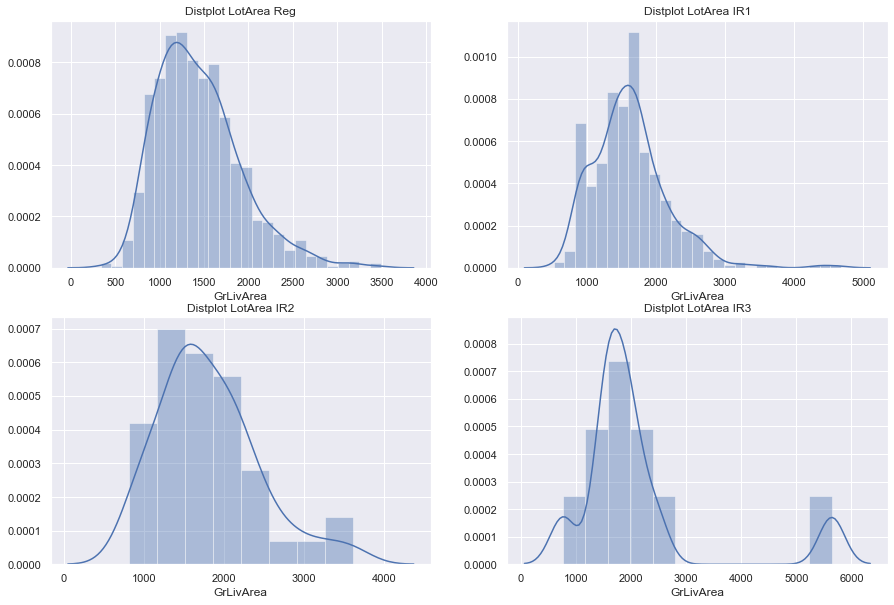

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
columns = ['Reg','IR1','IR2','IR3']

for column,axes in zip(columns, ax.flatten()):
    axes.title.set_text('Distplot LotArea {}'.format(column))
    sns.distplot(X[X.LotShape == column]['GrLivArea'],ax=axes)
     
plt.show()

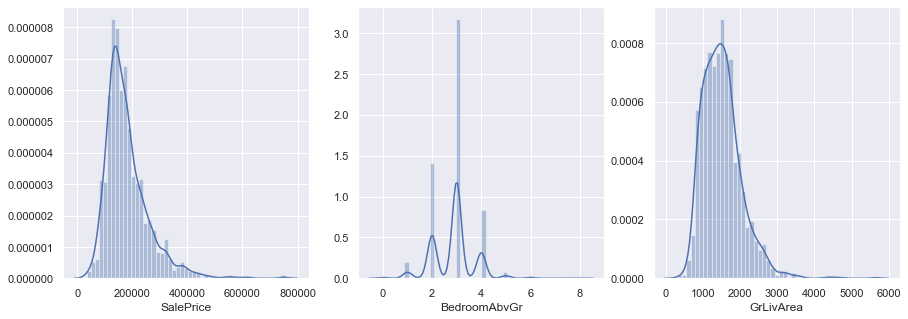

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
columns = ['SalePrice','BedroomAbvGr', 'GrLivArea']

for column,axes in zip(columns, ax.flatten()):
    sns.distplot(train[column],ax=axes)
      
plt.show()

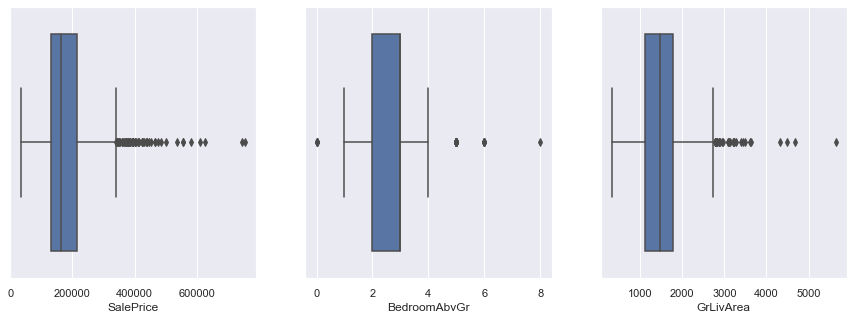

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for column,axes in zip(columns, ax.flatten()):
    sns.boxplot(train[column],ax=axes)
      
plt.show()

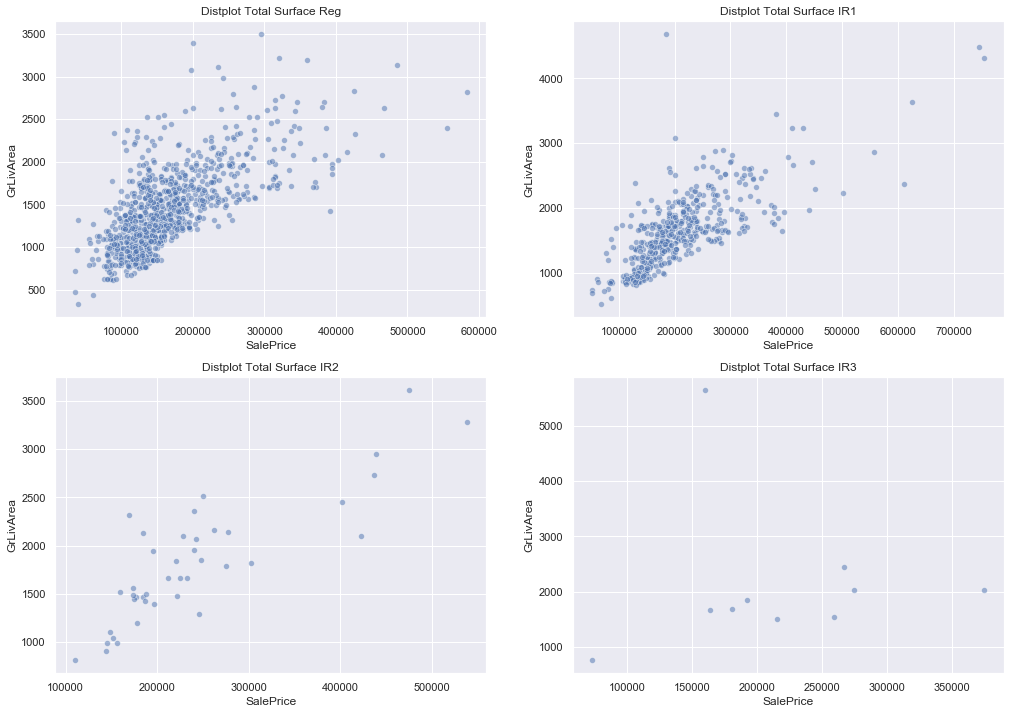

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17,12))
columns = ['Reg','IR1','IR2','IR3']
color = ['red']

for column,axes in zip(columns, ax.flatten()):
    axes.title.set_text('Distplot Total Surface {}'.format(column))
    sns.scatterplot(y=train[train.LotShape == column]['GrLivArea'],x=train[train.LotShape == column]['SalePrice'],ax=axes, alpha=0.5)
    
plt.show()

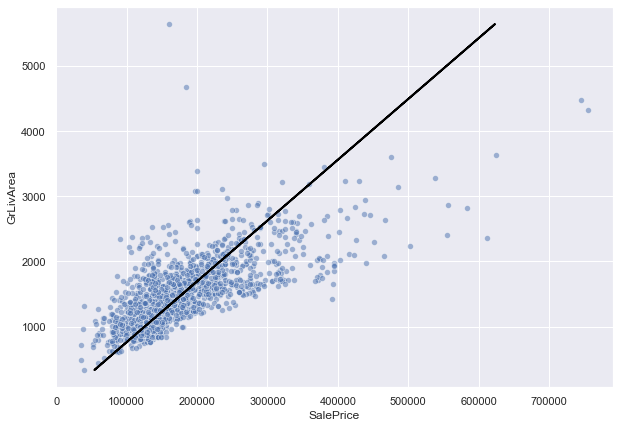

In [42]:
from sklearn.linear_model import LinearRegression

le = LinearRegression()

le.fit(train['GrLivArea'].values.reshape(-1,1), train['SalePrice'].values)

pred = le.predict(train['GrLivArea'].values.reshape(-1,1))

plt.figure(figsize=(10,7))
sns.scatterplot(train['SalePrice'], train['GrLivArea'], alpha=0.5)
plt.plot(pred, train['GrLivArea'],color='black', linewidth=2)
plt.show()

In [43]:
y = X['SalePrice']
X = pd.concat([X.loc[:, X.columns != 'SalePrice'], test])

In [51]:
numeric_features = ['GrLivArea', 'OverallQual', 'BedroomAbvGr', 'GarageArea']
cat_features = ['LotShape','BldgType', 'HouseStyle']
features = cat_features + numeric_features

In [52]:
from scipy.stats import skew


skewed_feats = X[numeric_features].apply(lambda x: skew(x))
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats
skewed_feats = skewed_feats.index

X[skewed_feats] = np.log1p(X[skewed_feats])
y = np.log1p(y)

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_features= ['LotShape','BldgType', 'HouseStyle']

X['LotShape'] = le.fit_transform(X['LotShape'])
X['BldgType'] = le.fit_transform(X['BldgType'])
X['HouseStyle'] = le.fit_transform(X['HouseStyle'])

In [54]:
final_features = pd.get_dummies(X[cat_features + numeric_features]).reset_index(drop=True)

In [55]:
final_features

,LotShape,BldgType,HouseStyle,GrLivArea,OverallQual,BedroomAbvGr,GarageArea
0,3,0,5,2.133555,1.124748,0.869742,1.988983
1,3,0,2,2.096943,1.080418,0.869742,1.964788
2,0,0,5,2.138688,1.124748,0.869742,2.003076
3,0,0,5,2.134038,1.124748,0.869742,2.010379
4,0,0,5,2.162835,1.162283,0.959135,2.045086
...,...,...,...,...,...,...,...
2914,3,3,5,2.079027,0.959135,0.869742,0.000000
2915,3,4,5,2.079027,0.959135,0.869742,1.896042
2916,3,0,2,2.093184,1.026672,0.959135,1.995767
2917,3,0,6,2.064116,1.026672,0.869742,0.000000


In [56]:
test = final_features[len(y):]
X_train = final_features[:len(y)]

In [57]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNetCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return rmse

In [58]:

m_ridge = make_pipeline(RobustScaler(),Ridge())

In [59]:
alphas_ridge = [0.05,0.1,0.3,1,3,5,10]

cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas_ridge]

Text(0, 0.5, 'rmse')

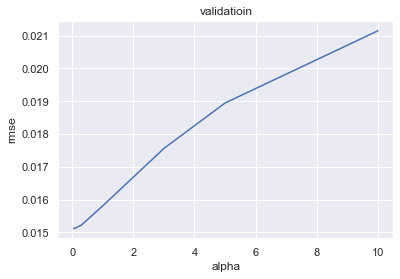

In [60]:
cv_ridge = pd.Series(cv_ridge, index=alphas_ridge)
cv_ridge.plot(title = 'validatioin')
plt.xlabel('alpha')
plt.ylabel('rmse')

In [61]:

from sklearn.model_selection import KFold

kfolds = KFold(n_splits=10,shuffle=True)

def cv_rmse(model, X_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)